In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
df = pd.read_csv('credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.shape

(32581, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [12]:
df.loan_grade.value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [13]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [14]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [15]:
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [16]:
df.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [17]:
df.duplicated().sum()

165

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(32416, 12)

In [20]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [21]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [22]:
num_cols= df.select_dtypes(include=['int64', 'float64'])
num_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


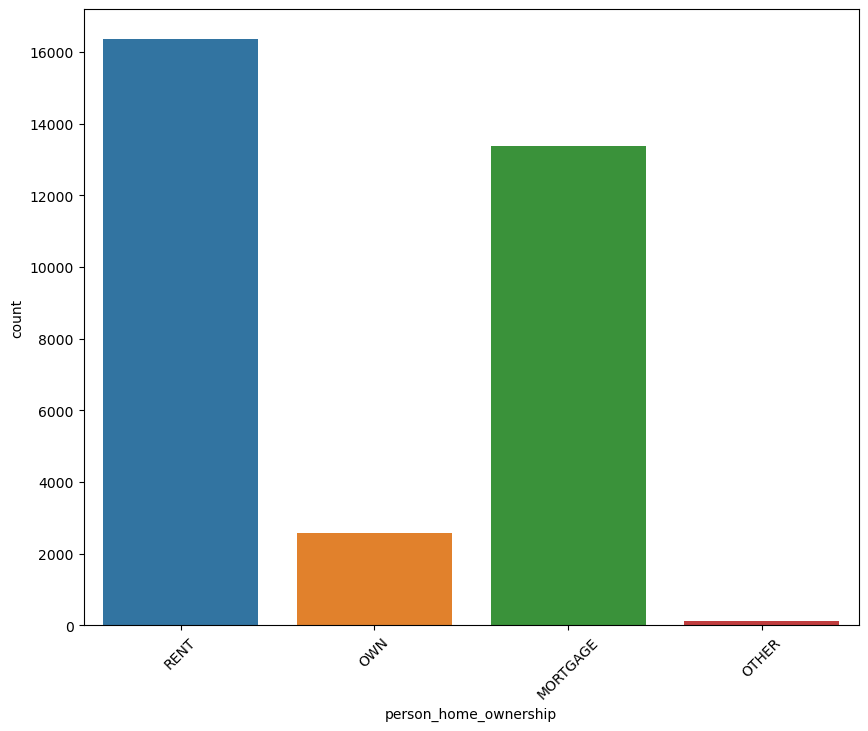

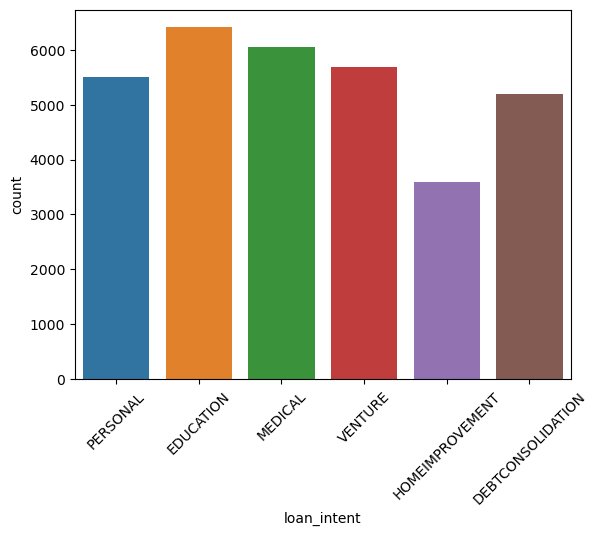

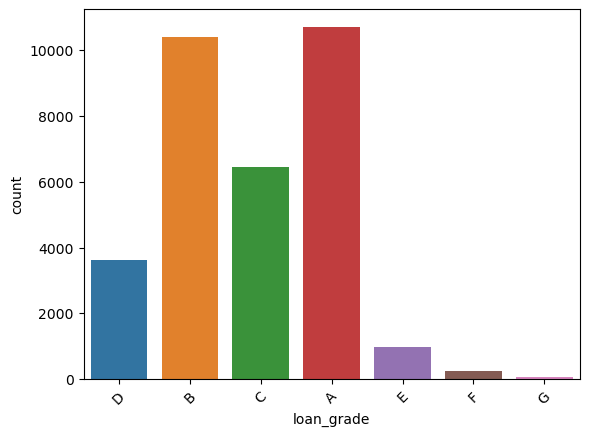

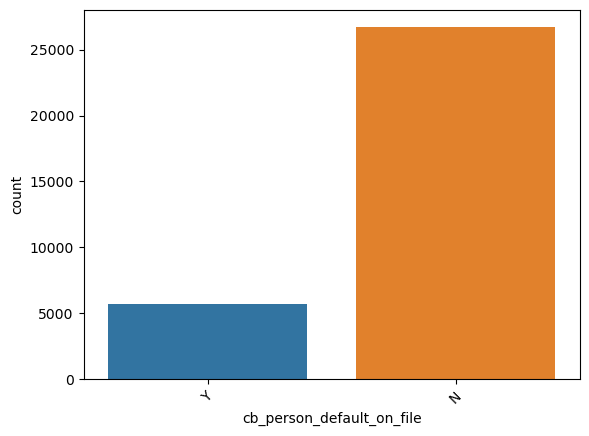

In [23]:
plt.figure(figsize=(10, 8))
for col in ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]:
    sns.countplot(data= df, x=col)
    plt.xticks(rotation= 45)
    plt.show()

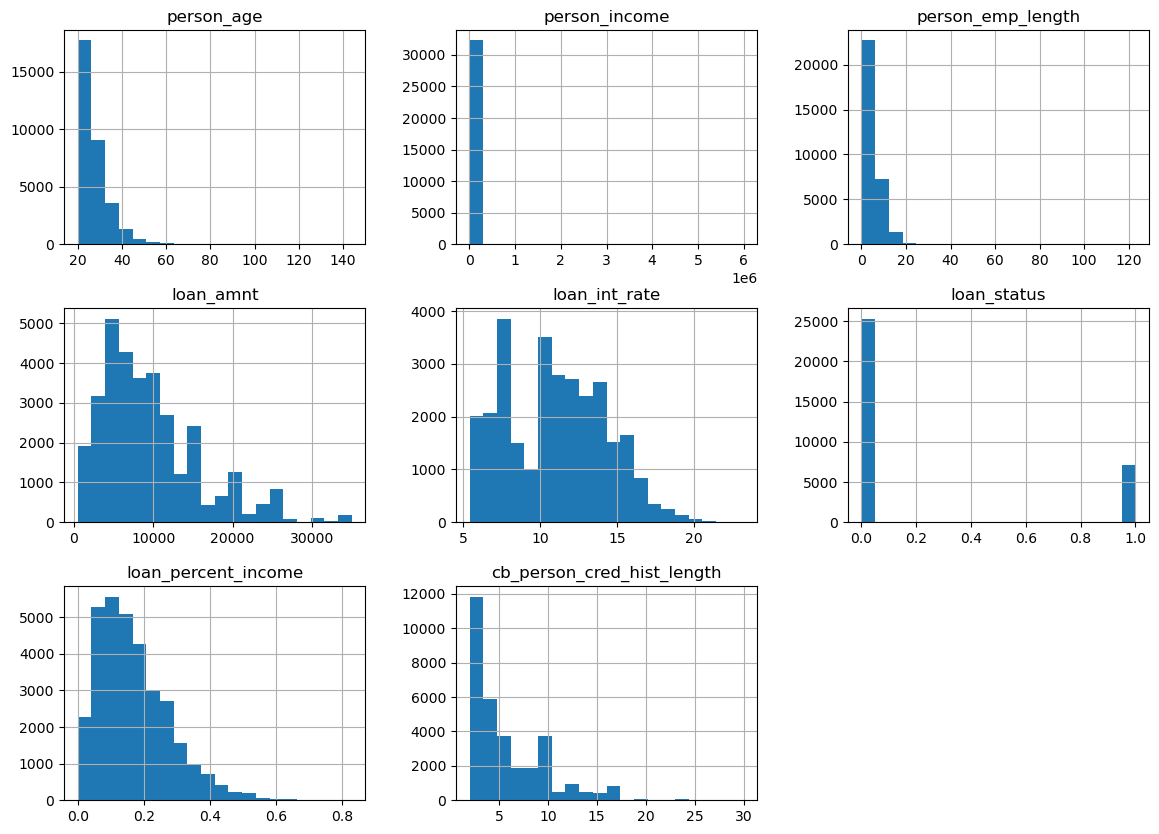

In [24]:
df.hist(bins=20, figsize=(14, 10))
plt.show()

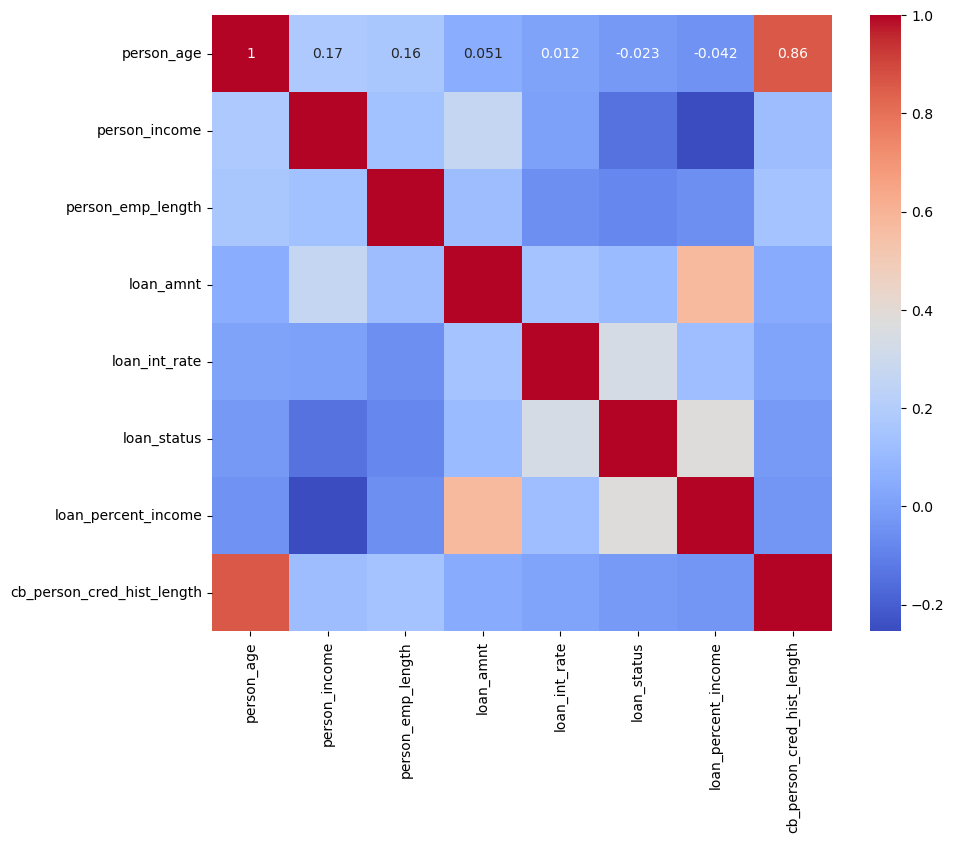

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

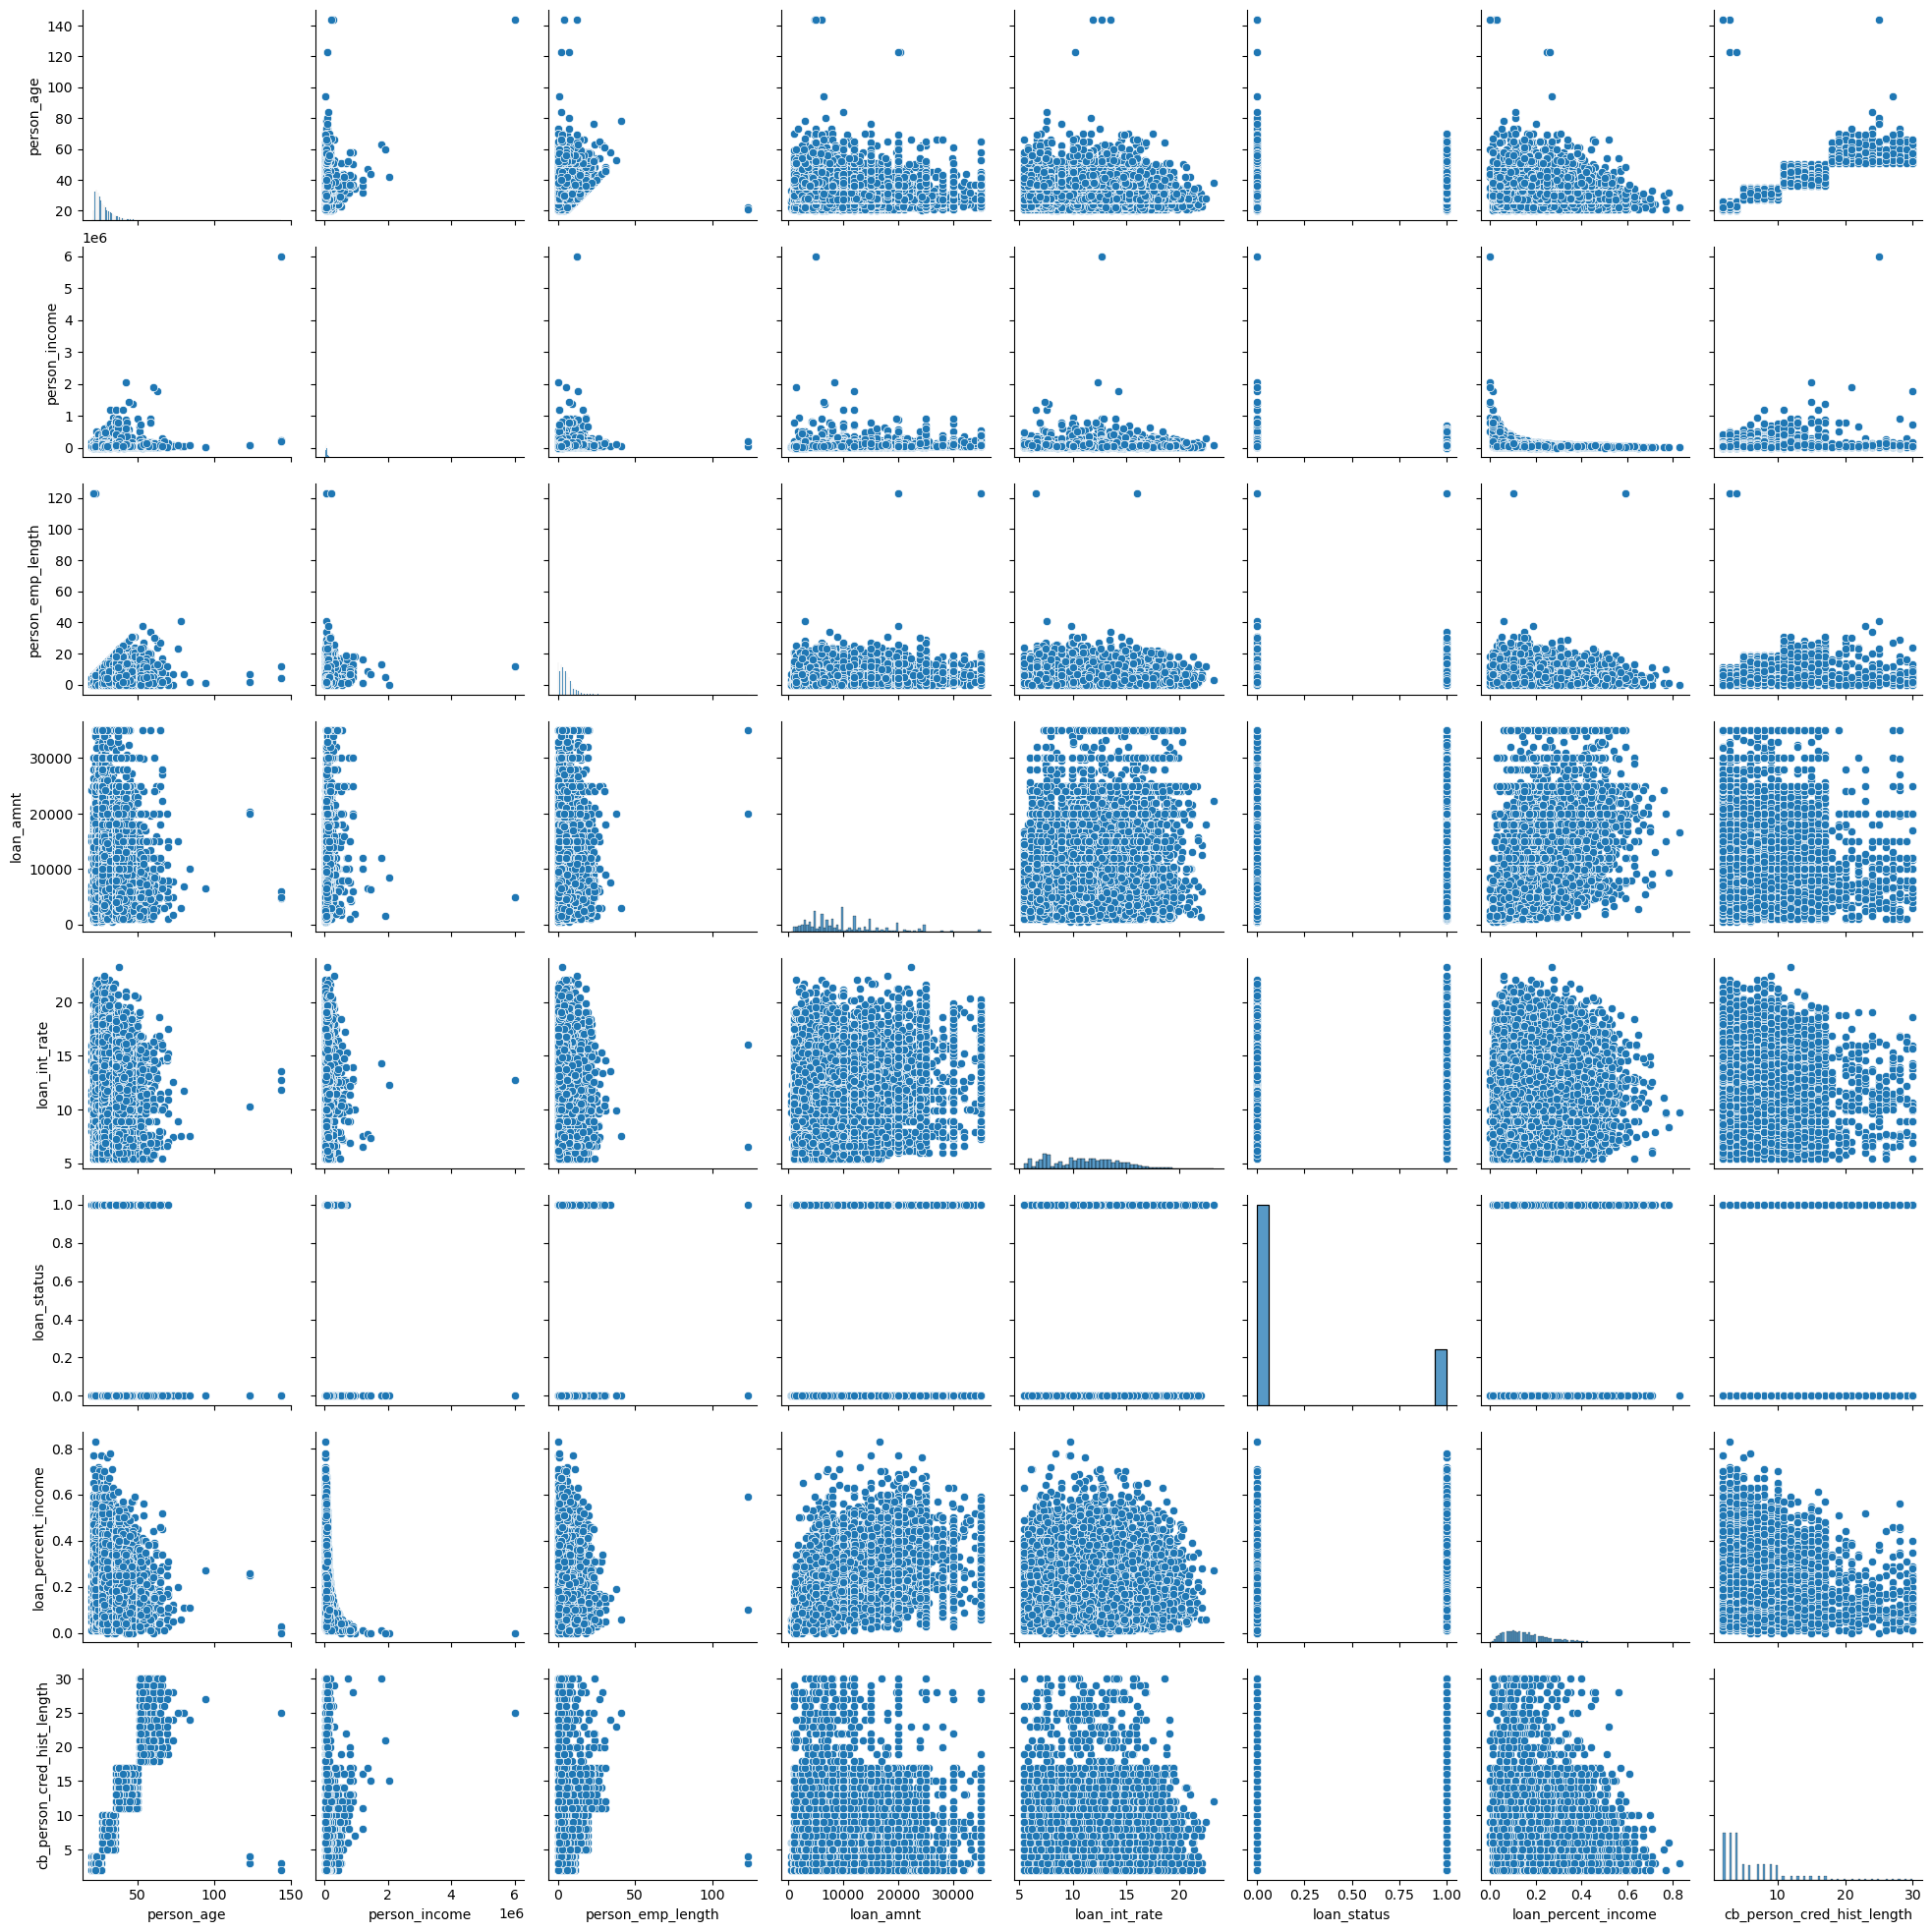

In [26]:
sns.pairplot(data=num_cols)

In [27]:
df.dropna(axis=0,inplace=True)

In [28]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [29]:
df.shape

(28501, 12)

In [30]:
outlier_age= df[df["person_age"] > 80].shape[0]
outlier_age

5

In [31]:
df = df[df["person_age"] < 80]
df.shape

(28495, 12)

In [32]:
outliers_emp_length = df[df['person_emp_length'] > 80].shape[0]
outliers_emp_length

2

In [33]:
df = df[df['person_emp_length'] <= 80]
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28493.000000,2.849300e+04,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000
mean,27.719721,6.642956e+04,4.781771,9657.454462,11.045321,0.217141,0.169522,5.799003
std,6.160631,5.151527e+04,4.038045,6327.910405,3.230829,0.412307,0.106381,4.037901
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.599200e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,78.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [34]:
df.shape

(28493, 12)

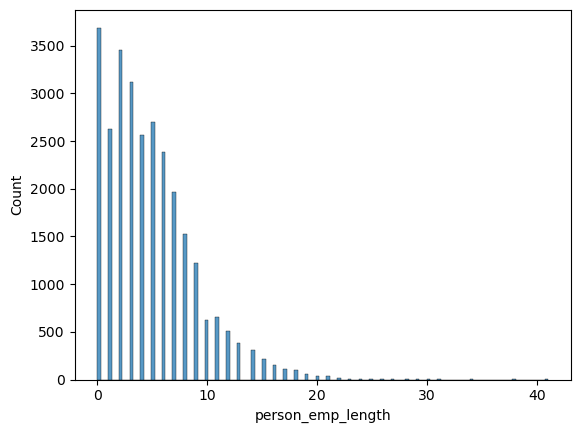

In [35]:
sns.histplot(data= df, x='person_emp_length')
plt.show()

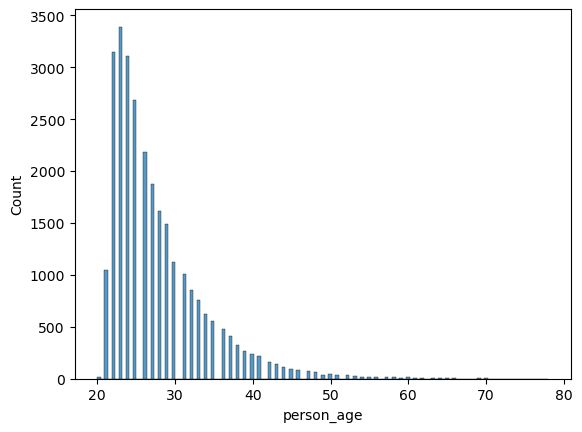

In [36]:
sns.histplot(data= df, x='person_age')
plt.show()

In [37]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,...,False,True,False,True,False,False,False,False,False,False


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [39]:
df[numerical_cols]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,-1.090771,-1.103179,0.054044,-1.368162,0.029305,-0.653524,-0.940853
2,-0.441476,-1.103179,-0.936552,-0.657014,0.564781,3.764618,-0.693195
3,-0.766123,-0.018045,-0.193605,4.004954,1.295256,3.388606,-0.940853
4,-0.603799,-0.233519,0.796991,4.004954,0.998114,3.576612,-0.445537
5,-1.090771,-1.097355,-0.688903,-1.131113,-1.208788,0.756521,-0.940853
...,...,...,...,...,...,...,...
32576,4.752888,-0.260695,-0.936552,-0.609604,0.654543,-0.559521,5.993565
32577,4.265917,1.039912,-0.193605,1.259134,-1.100455,-0.183509,3.269330
32578,6.051479,0.185782,-0.441254,4.004954,-0.017123,2.730584,5.498250
32579,4.590564,1.622274,0.054044,0.844298,0.134543,-0.653524,5.002934


In [40]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,-1.090771,-1.103179,0.054044,-1.368162,0.029305,0,-0.653524,-0.940853,False,True,...,False,False,False,True,False,False,False,False,False,False
2,-0.441476,-1.103179,-0.936552,-0.657014,0.564781,1,3.764618,-0.693195,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.766123,-0.018045,-0.193605,4.004954,1.295256,1,3.388606,-0.940853,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.603799,-0.233519,0.796991,4.004954,0.998114,1,3.576612,-0.445537,False,False,...,True,False,False,False,True,False,False,False,False,True
5,-1.090771,-1.097355,-0.688903,-1.131113,-1.208788,1,0.756521,-0.940853,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.752888,-0.260695,-0.936552,-0.609604,0.654543,0,-0.559521,5.993565,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,4.265917,1.039912,-0.193605,1.259134,-1.100455,0,-0.183509,3.269330,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,6.051479,0.185782,-0.441254,4.004954,-0.017123,1,2.730584,5.498250,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,4.590564,1.622274,0.054044,0.844298,0.134543,0,-0.653524,5.002934,False,False,...,False,True,False,True,False,False,False,False,False,False


In [41]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,-1.090771,-1.103179,0.054044,-1.368162,0.029305,0,-0.653524,-0.940853,False,True,...,False,False,False,True,False,False,False,False,False,False
2,-0.441476,-1.103179,-0.936552,-0.657014,0.564781,1,3.764618,-0.693195,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.766123,-0.018045,-0.193605,4.004954,1.295256,1,3.388606,-0.940853,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.603799,-0.233519,0.796991,4.004954,0.998114,1,3.576612,-0.445537,False,False,...,True,False,False,False,True,False,False,False,False,True
5,-1.090771,-1.097355,-0.688903,-1.131113,-1.208788,1,0.756521,-0.940853,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.752888,-0.260695,-0.936552,-0.609604,0.654543,0,-0.559521,5.993565,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,4.265917,1.039912,-0.193605,1.259134,-1.100455,0,-0.183509,3.269330,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,6.051479,0.185782,-0.441254,4.004954,-0.017123,1,2.730584,5.498250,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,4.590564,1.622274,0.054044,0.844298,0.134543,0,-0.653524,5.002934,False,False,...,False,True,False,True,False,False,False,False,False,False


In [42]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [50]:
models = {
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [53]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    model_results[name] = {
    'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

results_df = pd.DataFrame(model_results).T



[LightGBM] [Info] Number of positive: 4929, number of negative: 17865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 22794, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216241 -> initscore=-1.287707
[LightGBM] [Info] Start training from score -1.287707
                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Support Vector Machine  0.914897   0.942726  0.654213  0.772407  0.902699
K-Nearest Neighbors     0.891911   0.830247  0.641494  0.723767  0.866750
Decision Tree           0.888577   0.737605  0.768680  0.752822  0.845610
Logistic Regression     0.869802   0.789238  0.559618  0.654884  0.878506
Random Forest           0.933673   0.968085  0.723370  0.828025  0.933959


In [54]:
print(results_df)

                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Support Vector Machine  0.914897   0.942726  0.654213  0.772407  0.902699
K-Nearest Neighbors     0.891911   0.830247  0.641494  0.723767  0.866750
Decision Tree           0.888577   0.737605  0.768680  0.752822  0.845610
Logistic Regression     0.869802   0.789238  0.559618  0.654884  0.878506
Random Forest           0.933673   0.968085  0.723370  0.828025  0.933959
AdaBoost                0.883313   0.788705  0.643879  0.708972  0.898981
Bagging Classifier      0.930690   0.949948  0.724165  0.821831  0.913394
Extra Trees             0.919109   0.936473  0.679650  0.787655  0.917825
Gradient Boosting       0.925075   0.939683  0.705882  0.806173  0.927778
XGBoost                 0.936480   0.956212  0.746423  0.838393  0.952747
LightGBM                0.937006   0.982814  0.727345  0.835998  0.946803
